In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aptos2019/valid.csv
/kaggle/input/aptos2019/test.csv
/kaggle/input/aptos2019/train_1.csv
/kaggle/input/aptos2019/val_images/val_images/17f6c7072f61.png
/kaggle/input/aptos2019/val_images/val_images/0243404e8a00.png
/kaggle/input/aptos2019/val_images/val_images/0083ee8054ee.png
/kaggle/input/aptos2019/val_images/val_images/0ac436400db4.png
/kaggle/input/aptos2019/val_images/val_images/0d0a21fd354f.png
/kaggle/input/aptos2019/val_images/val_images/02da652c74b8.png
/kaggle/input/aptos2019/val_images/val_images/15e96e848b46.png
/kaggle/input/aptos2019/val_images/val_images/059bc89df7f4.png
/kaggle/input/aptos2019/val_images/val_images/04d029cfb612.png
/kaggle/input/aptos2019/val_images/val_images/08752092140d.png
/kaggle/input/aptos2019/val_images/val_images/0ef4c61dc056.png
/kaggle/input/aptos2019/val_images/val_images/1a7e3356b39c.png
/kaggle/input/aptos2019/val_images/val_images/06be1092a062.png
/kaggle/input/aptos2019/val_images/val_images/03a7f4a5786f.png
/kaggle/input/a

#   **Import all dependencies**

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# **Define directory path to images**

In [9]:
# Define directory path to images
image_dir = '/kaggle/input/aptos2019/train_images/train_images'
train_df = pd.read_csv('/kaggle/input/aptos2019/train_1.csv')

# Function to load and preprocess image with error handling
def load_image(image_id):
    image_path = os.path.join(image_dir, image_id + '.png')
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found or empty: {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    return image


# **Visualize the images from each class**

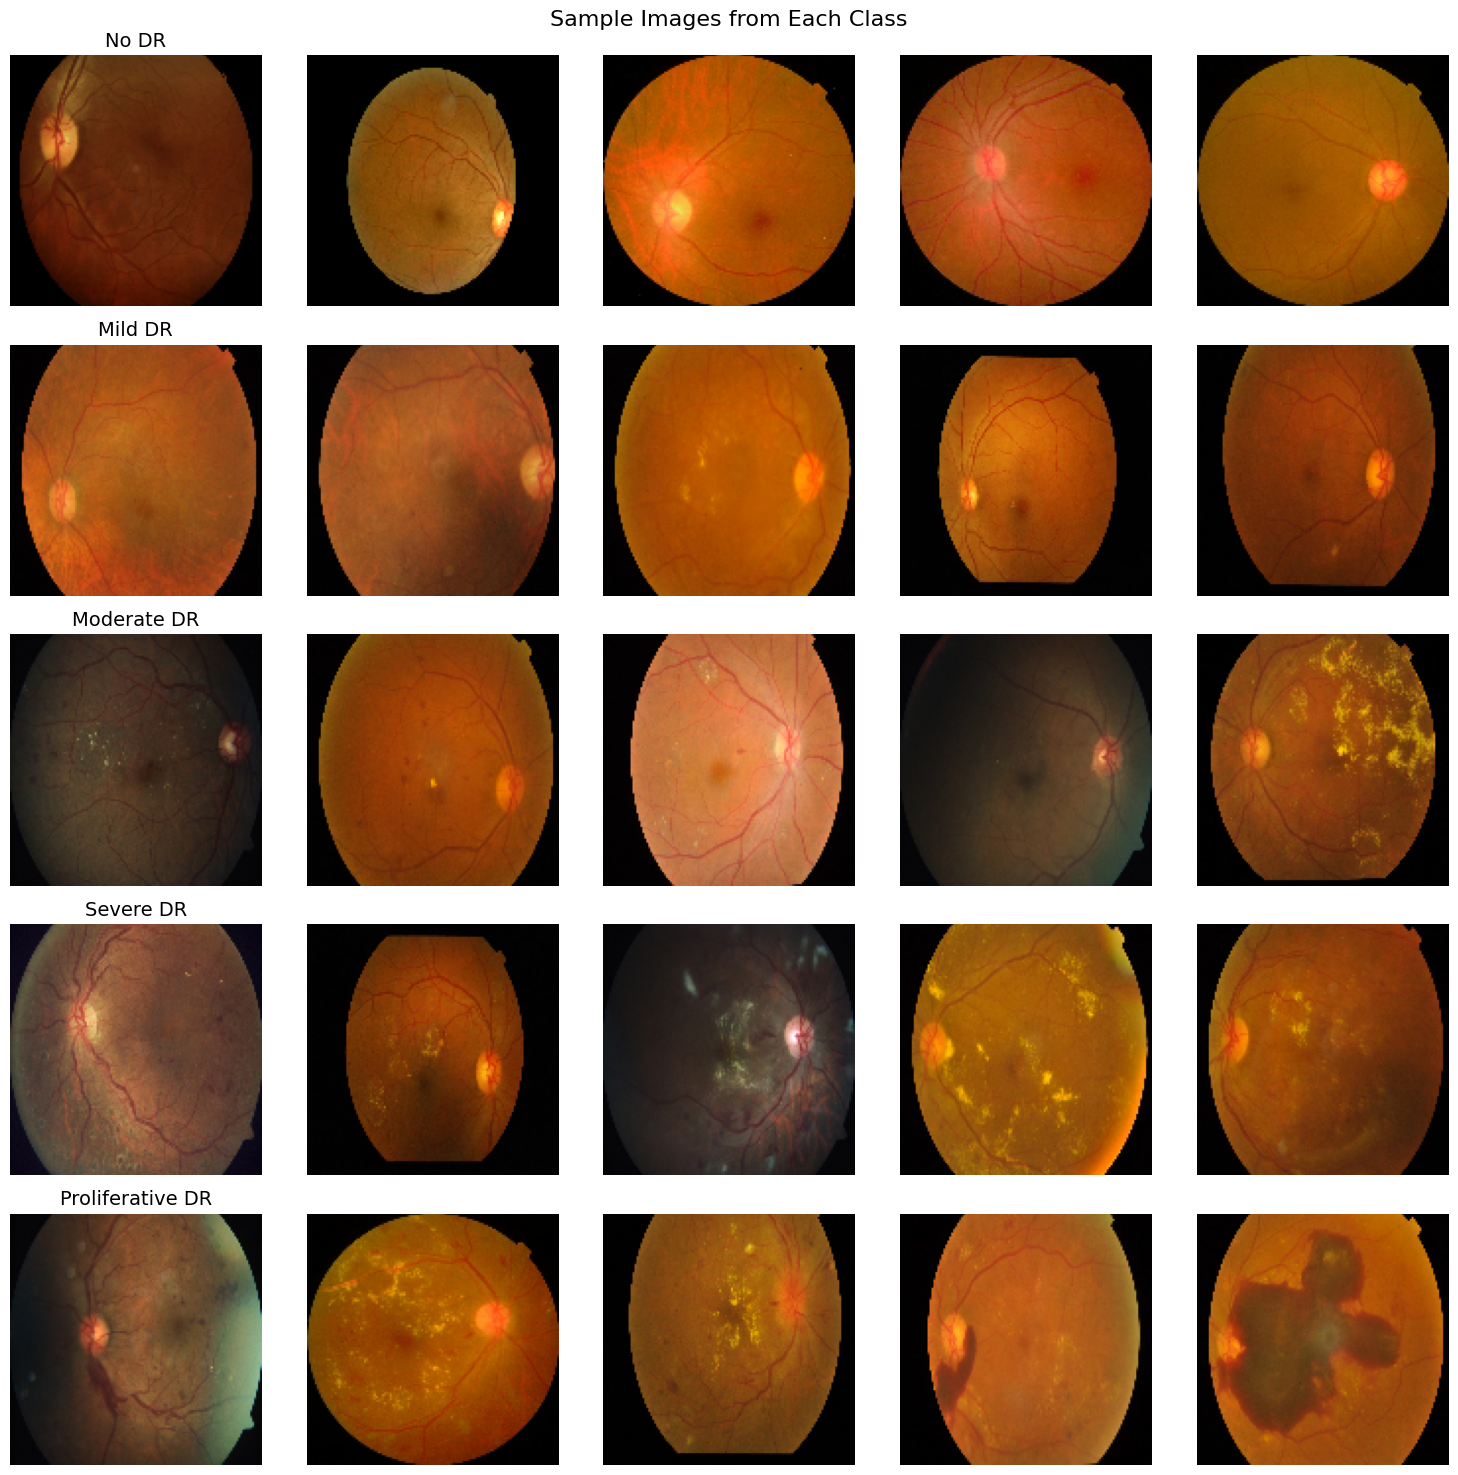

In [13]:
# Display sample images from each class
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle('Sample Images from Each Class', fontsize=16)

for i in range(5):
    class_samples = train_df[train_df['diagnosis'] == i].sample(5, random_state=42)
    for j, (idx, row) in enumerate(class_samples.iterrows()):
        image = load_image(row['id_code'])
        ax = axes[i, j]
        if image is not None:
            ax.imshow(image)
        else:
            ax.text(0.5, 0.5, 'Image not found', fontsize=12, ha='center')
        ax.axis('off')
        if j == 0:
            ax.set_title(class_names[i], fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


# **Visualize the distribution of each Class Diagnosis**

Train dataset:
        id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0

Test dataset:
        id_code  diagnosis
0  e4dcca36ceb4          0
1  e4e343eaae2a          2
2  e4f12411fd85          4
3  e50b0174690d          0
4  e5197d77ec68          0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


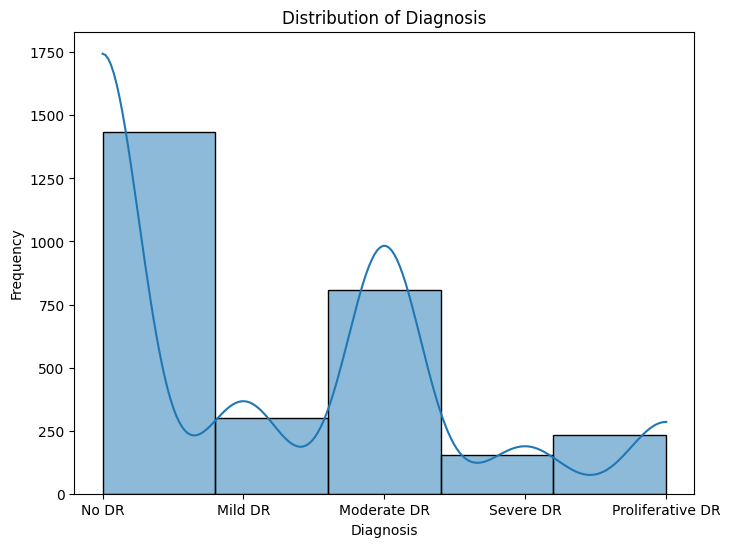

In [11]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

# Load the dataset
train_df = pd.read_csv('/kaggle/input/aptos2019/train_1.csv')
test_df = pd.read_csv('/kaggle/input/aptos2019/test.csv')

# Check the first few rows of the dataset
print("Train dataset:")
print(train_df.head())
print("\nTest dataset:")
print(test_df.head())

# Visualize the distribution of the target variable with class names
plt.figure(figsize=(8, 6))
sns.histplot(train_df['diagnosis'], bins=5, kde=True)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(ticks=range(5), labels=class_names)
plt.show()


# **Number of images in each Class**

Number of images in each class:
diagnosis
0    1434
1     300
2     808
3     154
4     234
Name: count, dtype: int64


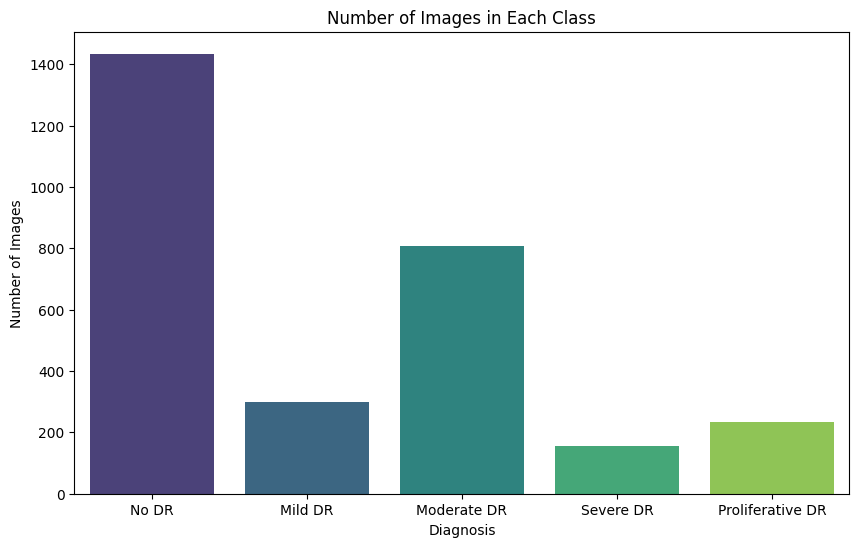

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('/kaggle/input/aptos2019/train_1.csv')

# Count the number of images in each class
class_counts = train_df['diagnosis'].value_counts().sort_index()

# Print the counts
print("Number of images in each class:")
print(class_counts)

# Define class names for better visualization
class_names = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Number of Images in Each Class')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Images')
plt.xticks(ticks=class_counts.index, labels=class_names)
plt.show()


# **Classification on normal given csv files**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:
# Load the dataset
train_df = pd.read_csv('/kaggle/input/aptos2019/train_1.csv')
test_df = pd.read_csv('/kaggle/input/aptos2019/test.csv')


In [16]:
# Add dummy features (e.g., pixel value sums) to train and test dataframes
# Note: This is just for demonstration. You would use actual image features in a real scenario.
train_df['dummy_feature'] = np.random.rand(len(train_df))
test_df['dummy_feature'] = np.random.rand(len(test_df))

# Split train data into features (X) and labels (y)
X = train_df[['dummy_feature']]
y = train_df['diagnosis']

# Split data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


**Random Forest Classifier**

In [17]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Make predictions and evaluate
y_pred = clf.predict(X_valid)
accuracy_rf = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy_rf * 100:.2f}%')

# Detailed classification report
print(classification_report(y_valid, y_pred))


Accuracy: 33.79%
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       275
           1       0.05      0.06      0.05        53
           2       0.33      0.28      0.30       178
           3       0.07      0.08      0.07        26
           4       0.02      0.02      0.02        54

    accuracy                           0.34       586
   macro avg       0.19      0.19      0.19       586
weighted avg       0.33      0.34      0.33       586



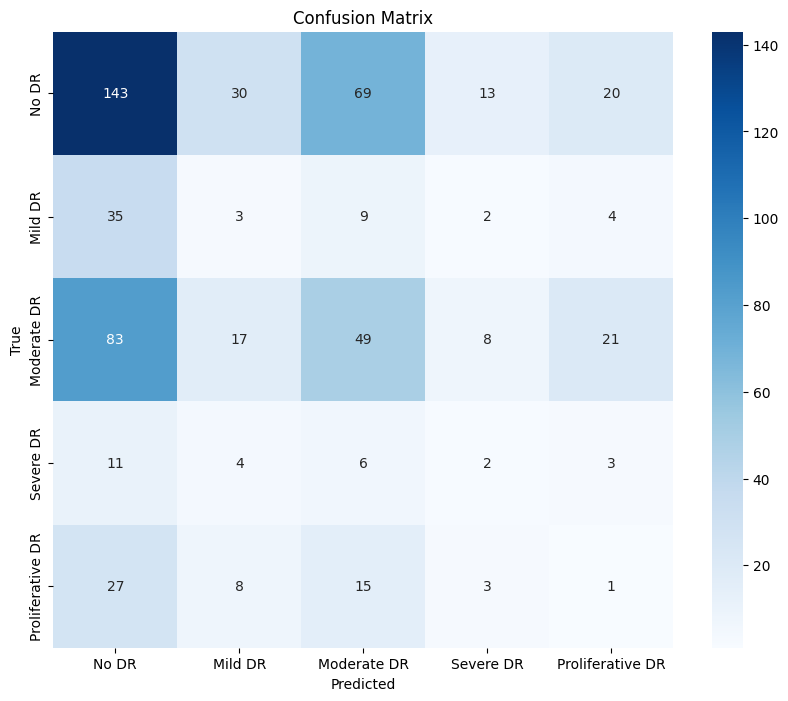

In [19]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_valid, y_pred)

# Define class names for better visualization
class_names = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Logistic Regression Classifier**

Logistic Regression Accuracy: 46.93%
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       275
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00       178
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        54

    accuracy                           0.47       586
   macro avg       0.09      0.20      0.13       586
weighted avg       0.22      0.47      0.30       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


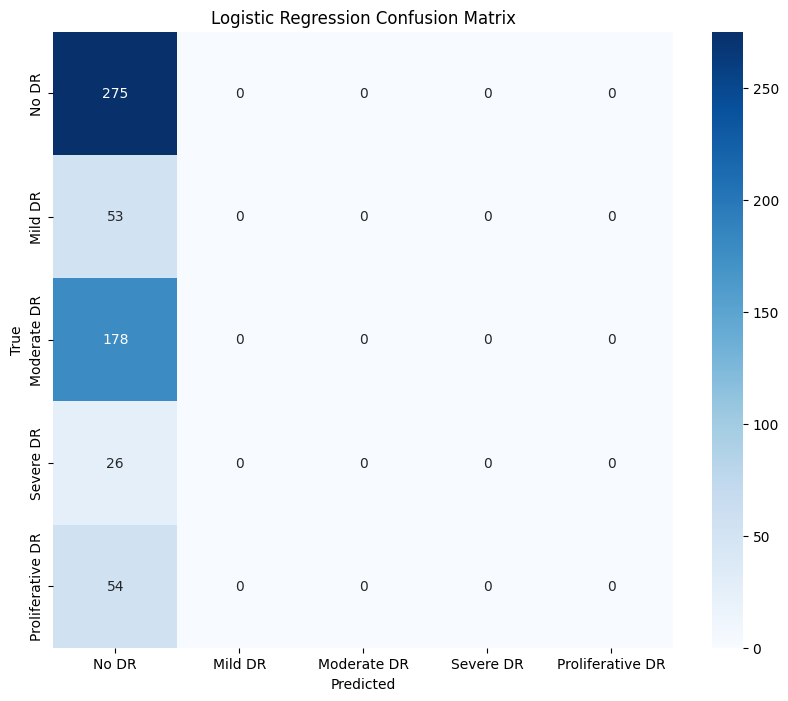

In [20]:
# Train a Logistic Regression Classifier
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)


# Make predictions with Logistic Regression and evaluate
y_pred_lr = clf_lr.predict(X_valid)
accuracy_lr = accuracy_score(y_valid, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')

# Detailed classification report for Logistic Regression
print("Logistic Regression Classification Report")
print(classification_report(y_valid, y_pred_lr))

# Generate the confusion matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_valid, y_pred_lr)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_lr, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**k-Nearest Neighbors Classifier**

k-Nearest Neighbors Accuracy: 39.93%
k-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.46      0.73      0.56       275
           1       0.04      0.02      0.03        53
           2       0.28      0.17      0.21       178
           3       0.20      0.04      0.06        26
           4       0.09      0.02      0.03        54

    accuracy                           0.40       586
   macro avg       0.21      0.20      0.18       586
weighted avg       0.32      0.40      0.34       586



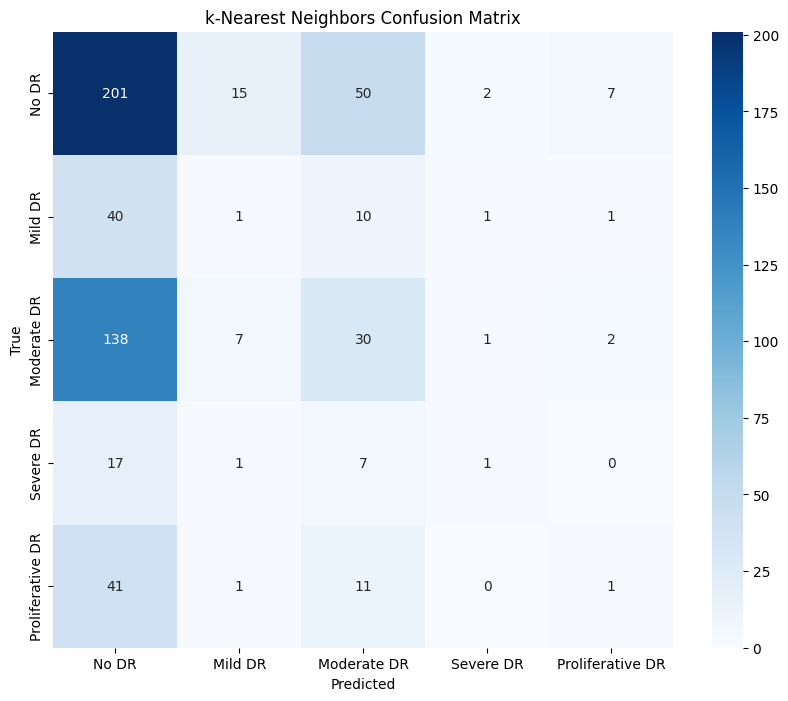

In [21]:
# Train a k-Nearest Neighbors Classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)


# Make predictions with k-Nearest Neighbors and evaluate
y_pred_knn = clf_knn.predict(X_valid)
accuracy_knn = accuracy_score(y_valid, y_pred_knn)
print(f'k-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print("k-Nearest Neighbors Classification Report")
print(classification_report(y_valid, y_pred_knn))
conf_mat_knn = confusion_matrix(y_valid, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Support Vector Machine Classifier**

Support Vector Machine Accuracy: 46.93%
Support Vector Machine Classification Report
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       275
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00       178
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        54

    accuracy                           0.47       586
   macro avg       0.09      0.20      0.13       586
weighted avg       0.22      0.47      0.30       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


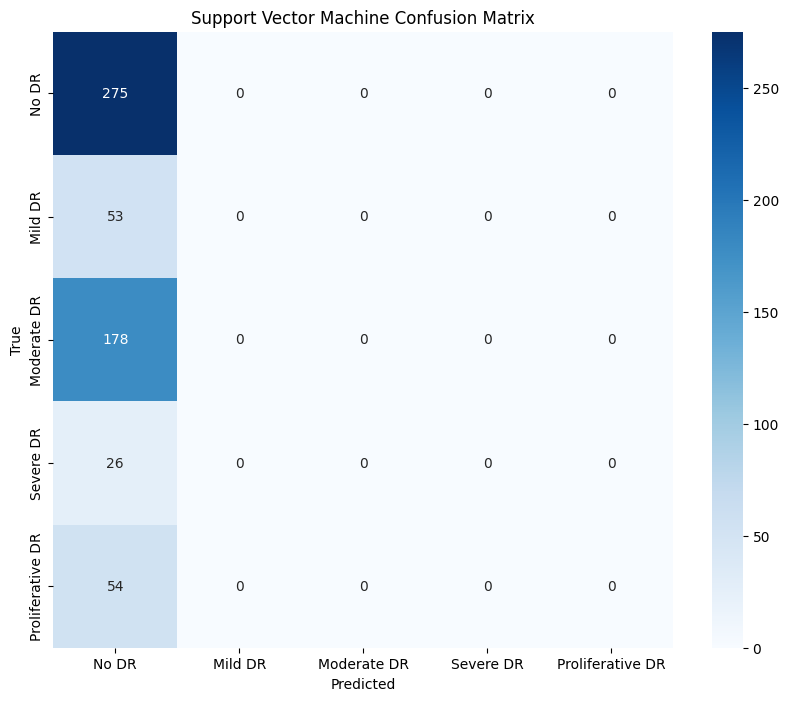

In [22]:
# Train a Support Vector Machine Classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train, y_train)

# Make predictions with Support Vector Machine and evaluate
y_pred_svm = clf_svm.predict(X_valid)
accuracy_svm = accuracy_score(y_valid, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm * 100:.2f}%')
print("Support Vector Machine Classification Report")
print(classification_report(y_valid, y_pred_svm))
conf_mat_svm = confusion_matrix(y_valid, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




**Naive Bayes Classifier**

Naive Bayes Accuracy: 46.93%
Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       275
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00       178
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        54

    accuracy                           0.47       586
   macro avg       0.09      0.20      0.13       586
weighted avg       0.22      0.47      0.30       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


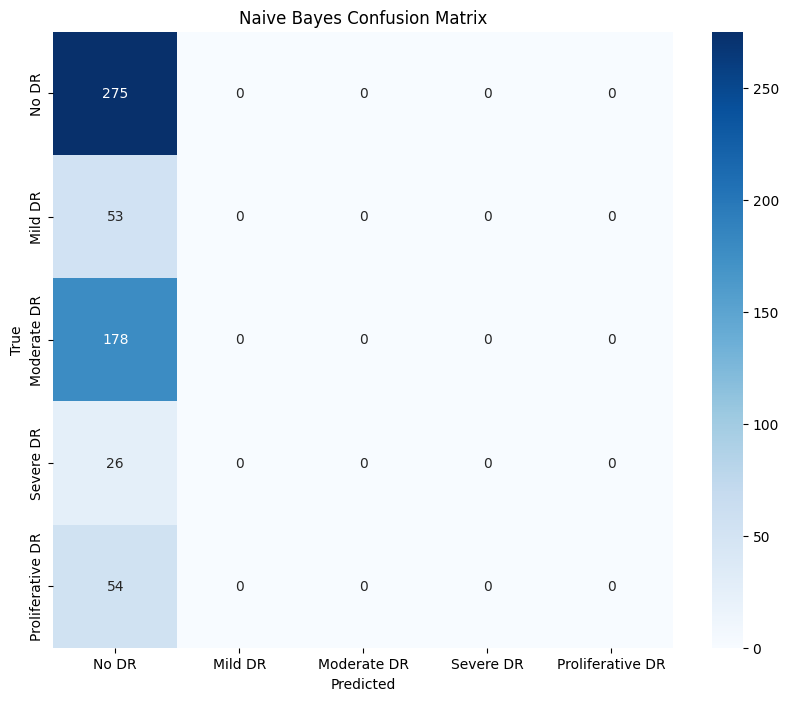

In [23]:
# Train a Naive Bayes Classifier
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Make predictions with Naive Bayes and evaluate
y_pred_nb = clf_nb.predict(X_valid)
accuracy_nb = accuracy_score(y_valid, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')
print("Naive Bayes Classification Report")
print(classification_report(y_valid, y_pred_nb))
conf_mat_nb = confusion_matrix(y_valid, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# **DataFrame for the metrics**

In [24]:
# Create a DataFrame for the metrics table with accuracy values in percentage form
metrics_df = pd.DataFrame({
    'Method': ['Random Forest Classifier', 'Logistic Regression', 'k-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [f'{accuracy_rf * 100:.2f}%', f'{accuracy_lr * 100:.2f}%', f'{accuracy_knn * 100:.2f}%', f'{accuracy_svm * 100:.2f}%', 
                 f'{accuracy_nb * 100:.2f}%']})


# Display the DataFrame
(metrics_df)



,Method,Accuracy
0,Random Forest Classifier,33.79%
1,Logistic Regression,46.93%
2,k-Nearest Neighbors,39.93%
3,Support Vector Machine,46.93%
4,Naive Bayes,46.93%


# **HOG Features Extraction**

# **Extracted features from HOG**

In [25]:
# Define directory path to images
image_dir = '/kaggle/input/aptos2019/train_images/train_images'

# Function to preprocess and extract HOG features from an image
def preprocess_and_extract_hog(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), block_norm='L2-Hys',
                      visualize=True, transform_sqrt=True)
    return features

# Prepare the dataset
features_list = []
labels_list = []

for idx, row in train_df.iterrows():
    image_path = os.path.join(image_dir, row['id_code'] + '.png')
    if os.path.exists(image_path):
        features = preprocess_and_extract_hog(image_path)
        features_list.append(features)
        labels_list.append(row['diagnosis'])

# Convert to DataFrame
features_df = pd.DataFrame(features_list)
features_df['label'] = labels_list


In [26]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.300654,0.084339,0.000000,0.064871,0.300654,0.064871,0.162244,0.064871,0.0,0.300654,...,0.318278,0.104928,0.074564,0.080707,0.318278,0.080707,0.000000,0.000000,0.0,2
1,0.077539,0.021801,0.084514,0.010909,0.103593,0.011808,0.014016,0.034028,0.0,0.291455,...,0.271965,0.000000,0.061730,0.066137,0.302294,0.033401,0.124433,0.032735,0.0,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.413539,...,0.292010,0.000000,0.000000,0.000000,0.361491,0.000000,0.000000,0.000000,0.0,4
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
4,0.291802,0.039011,0.146607,0.000000,0.291802,0.000000,0.152910,0.000000,0.0,0.291802,...,0.299104,0.000000,0.229026,0.000000,0.299104,0.000000,0.183220,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.287001,0.077908,0.101792,0.038954,0.316832,0.000000,0.203584,0.038954,0.0,0.316832,...,0.288080,0.000000,0.140414,0.000000,0.288080,0.000000,0.280829,0.000000,0.0,0
2926,0.287282,0.031018,0.171215,0.031018,0.287282,0.000000,0.000000,0.066533,0.0,0.287282,...,0.344390,0.000000,0.000000,0.000000,0.344390,0.000000,0.000000,0.000000,0.0,0
2927,0.283595,0.069369,0.236771,0.000000,0.283595,0.034684,0.283595,0.090186,0.0,0.283595,...,0.288436,0.136393,0.127278,0.000000,0.288436,0.000000,0.127278,0.000000,0.0,0
2928,0.270759,0.064030,0.176719,0.000000,0.270759,0.032015,0.218549,0.064030,0.0,0.270759,...,0.304889,0.060229,0.060229,0.000000,0.304889,0.000000,0.147529,0.000000,0.0,0


In [ ]:
# import os
# import cv2
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from skimage.feature import hog
# import seaborn as sns

# # Define class names
# class_names = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

# # Define directory path to images

# image_dir = '/kaggle/input/aptos2019/train_images/train_images'

# # Function to preprocess and extract HOG features from an image
# def preprocess_and_extract_hog(image_path):
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     image = cv2.resize(image, (128, 128))  # Resize for consistency
#     features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
#                               cells_per_block=(2, 2), block_norm='L2-Hys',
#                               visualize=True, transform_sqrt=True)
#     return features, hog_image


In [ ]:
# # Prepare the dataset
# features_list = []
# labels_list = []
# hog_images = []

# for idx, row in train_df.iterrows():
#     image_path = os.path.join(image_dir, row['id_code'] + '.png')
#     if os.path.exists(image_path):
#         features, hog_image = preprocess_and_extract_hog(image_path)
#         features_list.append(features)
#         labels_list.append(row['diagnosis'])
#         hog_images.append(hog_image)

# # Convert to DataFrame
# features_df = pd.DataFrame(features_list)
# features_df['label'] = labels_list
# features_df['hog_image'] = hog_images


In [ ]:
# # Function to display sample HOG images for each class
# def display_sample_hog_images(features_df, class_names):
#     fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
#     fig.suptitle('Sample HOG Feature Images from Each Class', fontsize=16)
    
#     for i in range(5):
#         class_samples = features_df[features_df['label'] == i].sample(5, random_state=42)
#         for j, (idx, row) in enumerate(class_samples.iterrows()):
#             hog_image = row['hog_image']
#             ax = axes[i, j]
#             ax.imshow(hog_image, cmap='gray')
#             ax.axis('off')
#             if j == 0:
#                 ax.set_title(class_names[i], fontsize=14)
    
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.95)
#     plt.show()

# # Display the sample HOG images
# display_sample_hog_images(features_df, class_names)


 **Random forest classification**

In [27]:
# Split data into training and testing sets
X = features_df.drop(columns=['label'])
y = features_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 72.53%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       275
           1       0.39      0.26      0.31        53
           2       0.60      0.75      0.67       178
           3       0.71      0.19      0.30        26
           4       1.00      0.04      0.07        54

    accuracy                           0.73       586
   macro avg       0.71      0.45      0.45       586
weighted avg       0.74      0.73      0.68       586



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report
import numpy as np


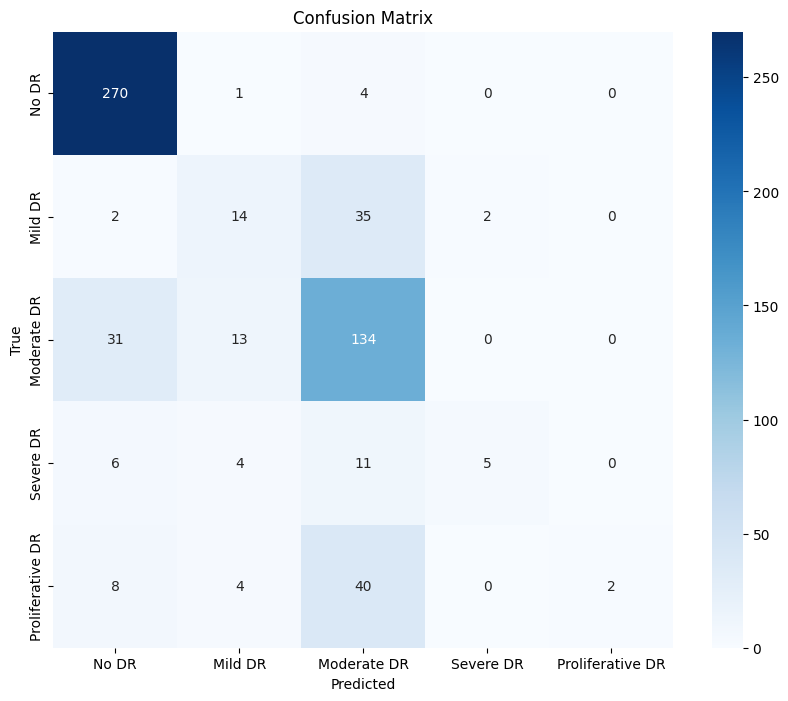

In [29]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**LogisticRegression**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 73.38%
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       275
           1       0.37      0.40      0.38        53
           2       0.63      0.71      0.67       178
           3       0.56      0.35      0.43        26
           4       0.23      0.11      0.15        54

    accuracy                           0.73       586
   macro avg       0.55      0.51      0.52       586
weighted avg       0.71      0.73      0.72       586



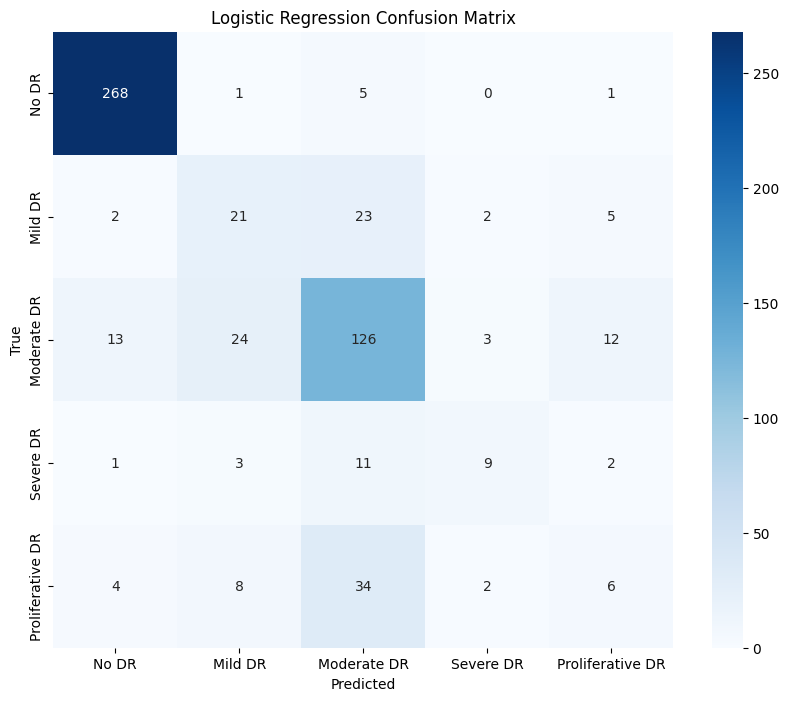

In [30]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression Classifier
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred_lr))

# Generate the confusion matrix
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_lr, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**KNeighborsClassifier**

k-Nearest Neighbors Accuracy: 68.43%
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       275
           1       0.39      0.60      0.47        53
           2       0.66      0.56      0.61       178
           3       0.44      0.15      0.23        26
           4       0.19      0.09      0.12        54

    accuracy                           0.68       586
   macro avg       0.50      0.47      0.46       586
weighted avg       0.66      0.68      0.66       586



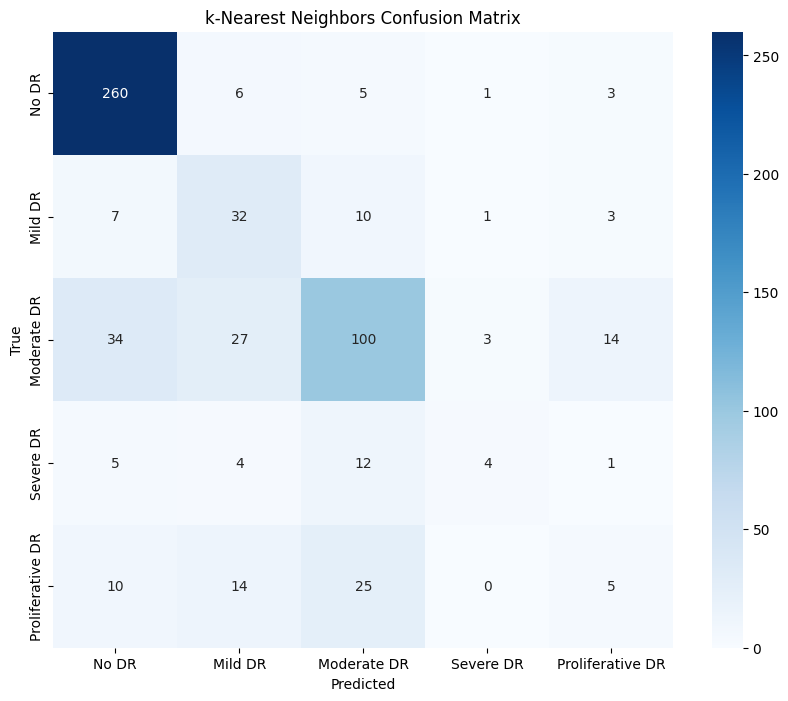

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Train a k-Nearest Neighbors Classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred_knn))

# Generate the confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Support Vector Machine Classifier**

Support Vector Machine Accuracy: 72.18%
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       275
           1       0.36      0.40      0.38        53
           2       0.63      0.67      0.65       178
           3       0.32      0.27      0.29        26
           4       0.35      0.13      0.19        54

    accuracy                           0.72       586
   macro avg       0.51      0.49      0.49       586
weighted avg       0.70      0.72      0.70       586



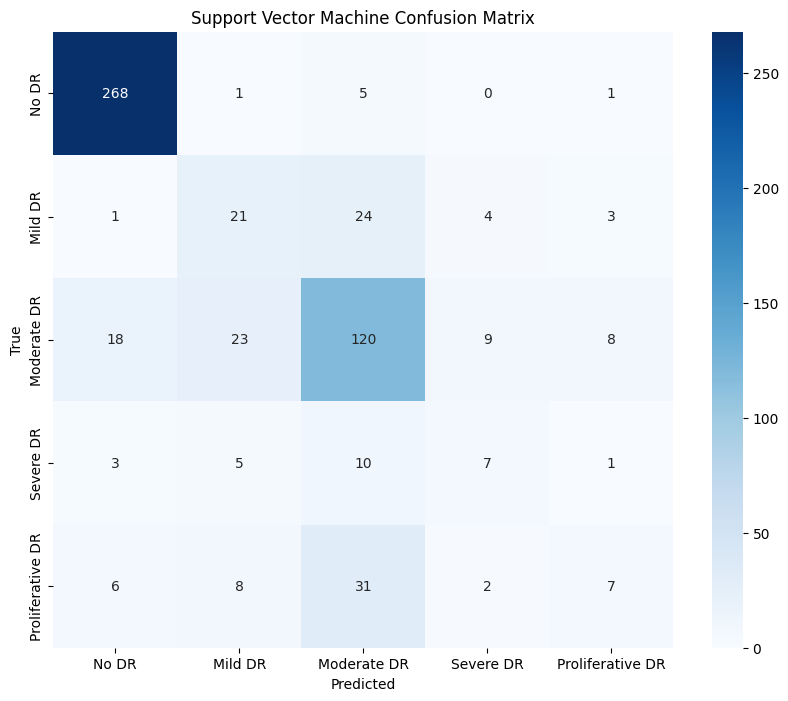

In [32]:
from sklearn.svm import SVC

# Train a Support Vector Machine Classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred_svm))

# Generate the confusion matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Naive Bayes Classifier**

Naive Bayes Accuracy: 57.17%
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       275
           1       0.30      0.79      0.44        53
           2       0.77      0.36      0.49       178
           3       0.13      0.50      0.20        26
           4       0.29      0.24      0.26        54

    accuracy                           0.57       586
   macro avg       0.48      0.53      0.44       586
weighted avg       0.73      0.57      0.61       586



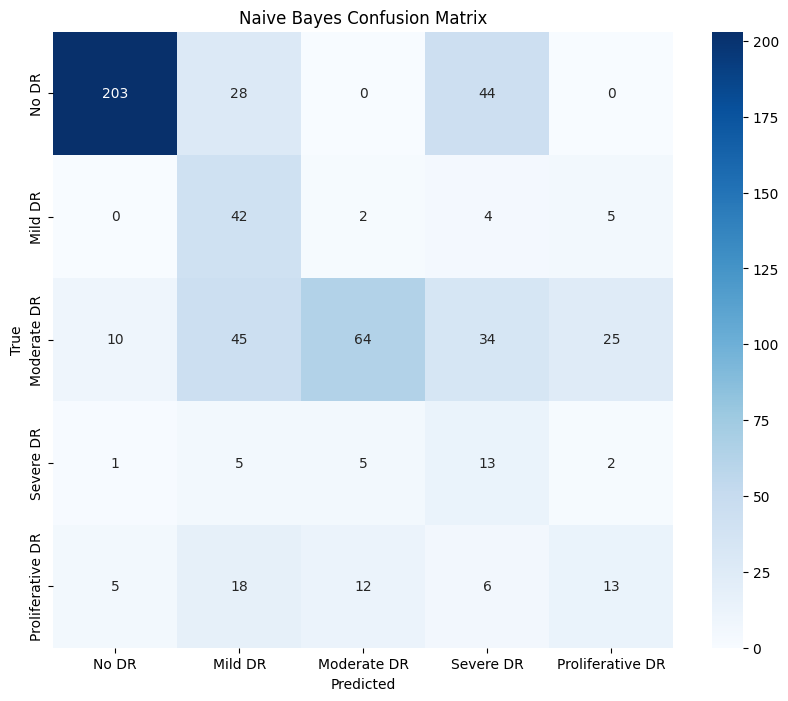

In [33]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes Classifier
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred_nb))

# Generate the confusion matrix
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **DataFrame for the metrics table with accuracy in HOG feature Extraction**

In [34]:
# Create a DataFrame for the metrics table with accuracy values in percentage form
metrics_df = pd.DataFrame({
    'Method': ['Random Forest Classifier', 'Logistic Regression', 'k-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [f'{accuracy_rf * 100:.2f}%', f'{accuracy_lr * 100:.2f}%', f'{accuracy_knn * 100:.2f}%', f'{accuracy_svm * 100:.2f}%', 
                 f'{accuracy_nb * 100:.2f}%']
})

# Display the DataFrame
print(metrics_df)


                     Method Accuracy
0  Random Forest Classifier   33.79%
1       Logistic Regression   73.38%
2       k-Nearest Neighbors   68.43%
3    Support Vector Machine   72.18%
4               Naive Bayes   57.17%


# **GIST Feature Extraction**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from PIL import Image
import numpy.matlib as nm
import numpy.fft as f

# Define the GIST extraction class
class GIST:
    def __init__(self, param):
        self.param = param

    def _createGabor(self, orr, n):
        gabor_param = []
        Nscalse = len(orr)
        Nfilters = sum(orr)
        if len(n) == 1:
            n = [n[0], n[0]]
        for i in range(Nscalse):
            for j in range(orr[i]):
                gabor_param.append([.35, .3/(1.85**(i)), 16*orr[i]**2/32**2, np.pi/(orr[i])*(j)])
        gabor_param = np.array(gabor_param)
        fx, fy = np.meshgrid(np.arange(-n[1]/2, n[1]/2), np.arange(-n[0]/2, n[0]/2))
        fr = f.fftshift(np.sqrt(fx**2 + fy**2))
        t = f.fftshift(np.angle(fx + 1j*fy))

        G = np.zeros([n[0], n[1], Nfilters])
        for i in range(Nfilters):
            tr = t + gabor_param[i, 3]
            tr += 2*np.pi*(tr < -np.pi) - 2 * np.pi*(tr > np.pi)
            G[:, :, i] = np.exp(-10*gabor_param[i, 0]*(fr/n[1]/gabor_param[i, 1]-1)**2-2*gabor_param[i, 2]*np.pi*tr**2)

        return G

    def _more_config(self, img):
        self.param["imageSize"] = [img.shape[0], img.shape[1]]
        self.param["G"] = self._createGabor(self.param["orientationsPerScale"], np.array(self.param["imageSize"]) + 2*self.param["boundaryExtension"])

    def _preprocess(self, img):
        M = self.param["imageSize"]
        if len(M) == 1:
            M = [M, M]
        scale = np.max([M[0]/img.shape[0], M[1]/img.shape[1]])
        newsize = list(map(int, np.round(np.array([img.shape[1], img.shape[0]]) * scale)))
        img = np.array(Image.fromarray(img).resize(newsize, Image.BILINEAR))

        nr, nc = img.shape
        sr = (nr-M[0])/2
        sc = (nc-M[1])/2

        img = img[int(sr):int(sr+M[0]), int(sc):int(sc+M[1])]
        img = img - np.min(img)
        if np.sum(img) != 0:
            img = 255 * (img / np.max(img))

        return img

    def _prefilt(self, img):
        w = 5
        fc = self.param["fc_prefilt"]
        s1 = fc/np.sqrt(np.log(2))
        img = np.log(img + 1)
        img = np.pad(img, [w, w], "symmetric")

        sn, sm = img.shape
        n = np.max([sn, sm])
        n += n % 2

        if sn == sm:
            img = np.pad(img, [0, int(n-sn)], "symmetric")
        elif sn < sm:
            img = np.pad(img, [0, int(n-sn)], "symmetric")[:, :sm + (1 if sm % 2 != 0 else 0)]
        else:
            img = np.pad(img, [0, int(n-sm)], "symmetric")[sn - sm:]

        fx, fy = np.meshgrid(np.arange(-n/2, n/2), np.arange(-n/2, n/2))
        gf = f.fftshift((np.exp(-(fx**2 + fy**2) / (s1**2))))
        gf = nm.repmat(gf, 1, 1)
        output = img - np.real(f.ifft2(f.fft2(img) * gf))

        localstd = nm.repmat(np.sqrt(abs(f.ifft2(f.fft2(output**2) * gf))), 1, 1)
        output = output / (0.2 + localstd)
        output = output[w:sn-w, w:sm-w]
        return output

    def _gistGabor(self, img):
        w = self.param["numberBlocks"]
        G = self.param["G"]
        be = self.param["boundaryExtension"]
        ny, nx, Nfilters = G.shape
        W = w[0] * w[1]
        N = 1
        g = np.zeros((W * Nfilters, N))
        img = np.pad(img, [be, be], "symmetric")
        img = f.fft2(img)

        k = 0
        for n in range(Nfilters):
            ig = abs(f.ifft2(img * nm.repmat(G[:, :, n], 1, 1)))
            ig = ig[be:ny-be, be:nx-be]
            v = self._downN(ig, w)
            g[k:k+W, 0] = v.reshape([W, N], order="F").flatten()
            k += W
        return np.array(g)

    def _downN(self, x, N):
        nx = list(map(int, np.floor(np.linspace(0, x.shape[0], N[0]+1))))
        ny = list(map(int, np.floor(np.linspace(0, x.shape[1], N[1]+1))))
        y = np.zeros((N[0], N[1]))
        for xx in range(N[0]):
            for yy in range(N[1]):
                a = x[nx[xx]:nx[xx+1], ny[yy]:ny[yy+1]]
                v = np.mean(np.mean(a, 0))
                y[xx, yy] = v
        return y

    def _gist_extract(self, img):
        self._more_config(img)
        img = self._preprocess(img)
        output = self._prefilt(img)
        gist = self._gistGabor(output)
        return gist.flatten()

# Define GIST parameters
param = {
    "orientationsPerScale": [8, 8, 8, 8],
    "numberBlocks": [4, 4],
    "fc_prefilt": 4,
    "boundaryExtension": 32
}

gist_extractor = GIST(param)

# Define directory path to images
image_dir = '/kaggle/input/aptos2019/train_images/train_images'

# Load dataset
train_df = pd.read_csv('/kaggle/input/aptos2019/train_1.csv')

# Prepare the dataset
gist_features_list = []
labels_list = []

for idx, row in train_df.iterrows():
    image_path = os.path.join(image_dir, row['id_code'] + '.png')
    if os.path.exists(image_path):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        features = gist_extractor._gist_extract(image)
        gist_features_list.append(features)
        labels_list.append(row['diagnosis'])

# Convert to DataFrame
gist_features_df = pd.DataFrame(gist_features_list)
gist_features_df['label'] = labels_list

# Split data into training and testing sets
X = gist_features_df.drop(columns=['label'])
y = gist_features_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Train Logistic Regression classifier
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train, y_train)

# Make predictions and evaluate Logistic Regression classifier
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
print(classification_report(y_test, y_pred_lr))

# Generate confusion matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**k-Nearest Neighbors classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

# Make predictions and evaluate k-Nearest Neighbors classifier
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print(classification_report(y_test, y_pred_knn))

# Generate confusion matrix for k-Nearest Neighbors
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix for k-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Naive Bayes classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Make predictions and evaluate Naive Bayes classifier
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')
print(classification_report(y_test, y_pred_nb))

# Generate confusion matrix for Naive Bayes
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Make predictions and evaluate Random Forest classifier
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf * 100:.2f}%')
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix for Random Forest classifier
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Support Vector Machine classifier**

In [ ]:
from sklearn.svm import SVC

# Train Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train, y_train)

# Make predictions and evaluate Support Vector Machine classifier
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm * 100:.2f}%')
print(classification_report(y_test, y_pred_svm))

# Generate confusion matrix for Support Vector Machine classifier
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for Support Vector Machine classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **LBP Feature Extraction**

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from skimage.feature import local_binary_pattern

# Define class names
class_names = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

# Define directory path to images
image_dir = '/kaggle/input/aptos2019/train_images/train_images'

# Load dataset
train_df = pd.read_csv('/kaggle/input/aptos2019/train_1.csv')

# Parameters for LBP
radius = 1
n_points = 8 * radius

# Function to preprocess and extract LBP features from an image
def preprocess_and_extract_lbp(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # Normalize the histogram
    return hist

# Prepare the dataset
lbp_features_list = []
labels_list = []

for idx, row in train_df.iterrows():
    image_path = os.path.join(image_dir, row['id_code'] + '.png')
    if os.path.exists(image_path):
        features = preprocess_and_extract_lbp(image_path)
        lbp_features_list.append(features)
        labels_list.append(row['diagnosis'])

# Convert to DataFrame
lbp_features_df = pd.DataFrame(lbp_features_list)
lbp_features_df['label'] = labels_list



In [4]:
lbp_features_df

,0,1,2,3,4,5,6,7,8,9,label
0,0.076355,0.081116,0.038452,0.069885,0.074890,0.098022,0.057739,0.101196,0.196716,0.205627,2
1,0.068298,0.074768,0.054810,0.101135,0.133545,0.132324,0.062378,0.091125,0.121155,0.160461,1
2,0.072693,0.069580,0.043884,0.063599,0.076782,0.068420,0.052795,0.070557,0.338806,0.142883,4
3,0.040344,0.045044,0.029846,0.049744,0.052368,0.046997,0.029846,0.047058,0.570007,0.088745,0
4,0.096130,0.087341,0.047302,0.067017,0.060364,0.086731,0.053894,0.104065,0.191406,0.205750,0
...,...,...,...,...,...,...,...,...,...,...,...
2925,0.101929,0.092163,0.045410,0.062134,0.061584,0.079773,0.055298,0.101624,0.189453,0.210632,0
2926,0.096863,0.088318,0.044434,0.062134,0.059265,0.070007,0.054260,0.096497,0.226257,0.201965,0
2927,0.105042,0.094543,0.042480,0.054565,0.049561,0.072021,0.053284,0.096130,0.215820,0.216553,0
2928,0.099060,0.094238,0.046143,0.061646,0.055481,0.074463,0.053772,0.100647,0.209473,0.205078,0


In [6]:
# Split data into training and testing sets
X = lbp_features_df.drop(columns=['label'])
y = lbp_features_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Logistic Regression classifier**

Logistic Regression Accuracy: 46.59%
              precision    recall  f1-score   support

           0       0.48      0.88      0.62       275
           1       0.00      0.00      0.00        53
           2       0.37      0.18      0.24       178
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        54

    accuracy                           0.47       586
   macro avg       0.17      0.21      0.17       586
weighted avg       0.34      0.47      0.37       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


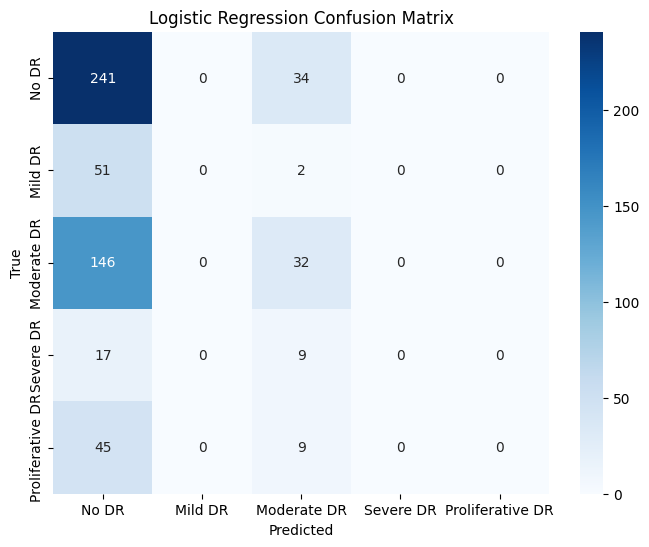

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Train Logistic Regression classifier
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train, y_train)

# Make predictions and evaluate Logistic Regression classifier
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
print(classification_report(y_test, y_pred_lr))

# Generate confusion matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**k-Nearest Neighbors classifier**

k-Nearest Neighbors Accuracy: 69.28%
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       275
           1       0.40      0.40      0.40        53
           2       0.62      0.65      0.63       178
           3       0.33      0.15      0.21        26
           4       0.44      0.13      0.20        54

    accuracy                           0.69       586
   macro avg       0.52      0.45      0.46       586
weighted avg       0.66      0.69      0.66       586



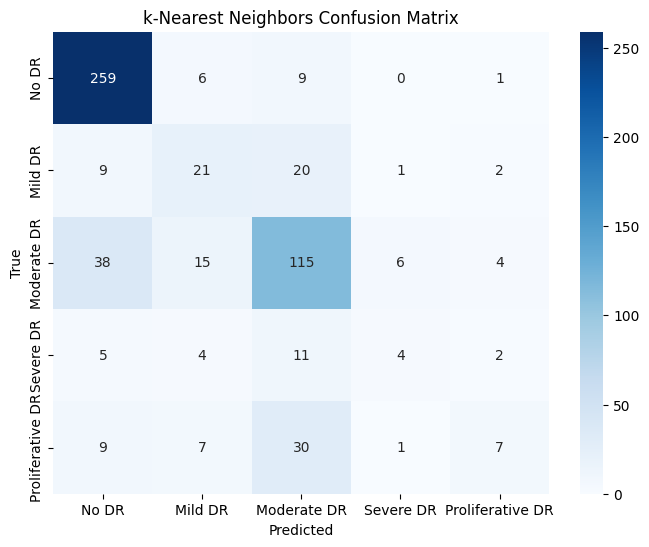

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

# Make predictions and evaluate k-Nearest Neighbors classifier
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print(classification_report(y_test, y_pred_knn))

# Generate confusion matrix for k-Nearest Neighbors
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix for k-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Naive Bayes classifier**

Naive Bayes Accuracy: 36.52%
              precision    recall  f1-score   support

           0       0.75      0.37      0.50       275
           1       0.14      0.72      0.24        53
           2       0.52      0.37      0.43       178
           3       0.13      0.27      0.18        26
           4       0.00      0.00      0.00        54

    accuracy                           0.37       586
   macro avg       0.31      0.35      0.27       586
weighted avg       0.53      0.37      0.39       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


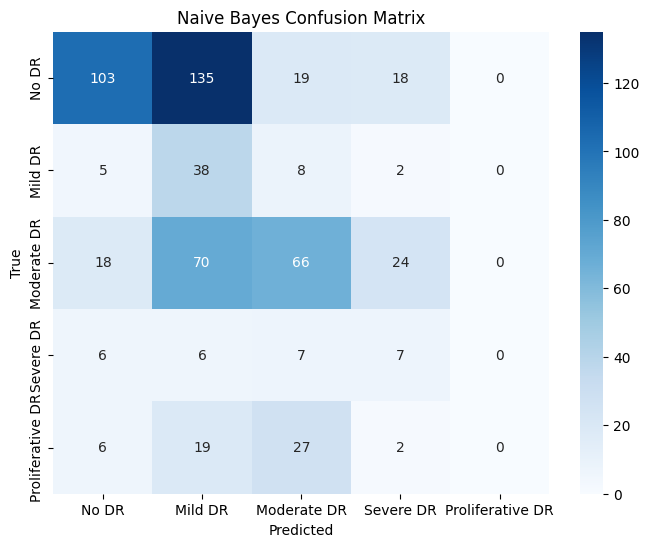

In [9]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Make predictions and evaluate Naive Bayes classifier
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')
print(classification_report(y_test, y_pred_nb))

# Generate confusion matrix for Naive Bayes
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Random Forest classifier**

Random Forest Classifier Accuracy: 73.55%
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       275
           1       0.46      0.36      0.40        53
           2       0.64      0.76      0.69       178
           3       0.50      0.19      0.28        26
           4       0.45      0.17      0.24        54

    accuracy                           0.74       586
   macro avg       0.58      0.49      0.51       586
weighted avg       0.71      0.74      0.71       586



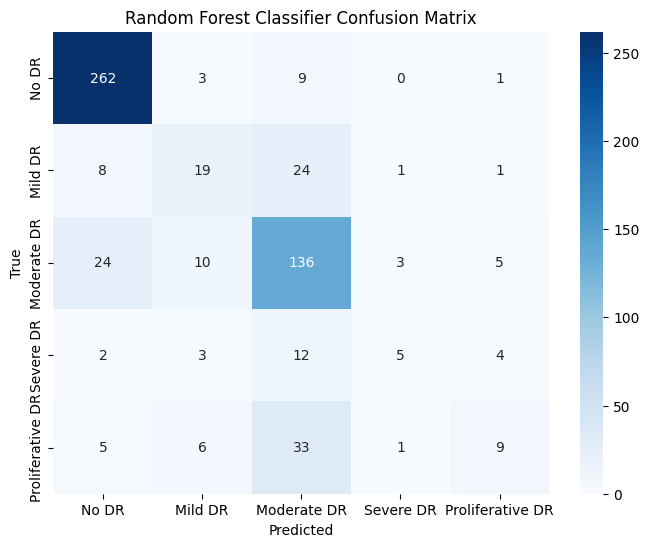

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Make predictions and evaluate Random Forest classifier
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf * 100:.2f}%')
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix for Random Forest classifier
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Support Vector Machine classifier**

Support Vector Machine Accuracy: 46.93%
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       275
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00       178
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        54

    accuracy                           0.47       586
   macro avg       0.09      0.20      0.13       586
weighted avg       0.22      0.47      0.30       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


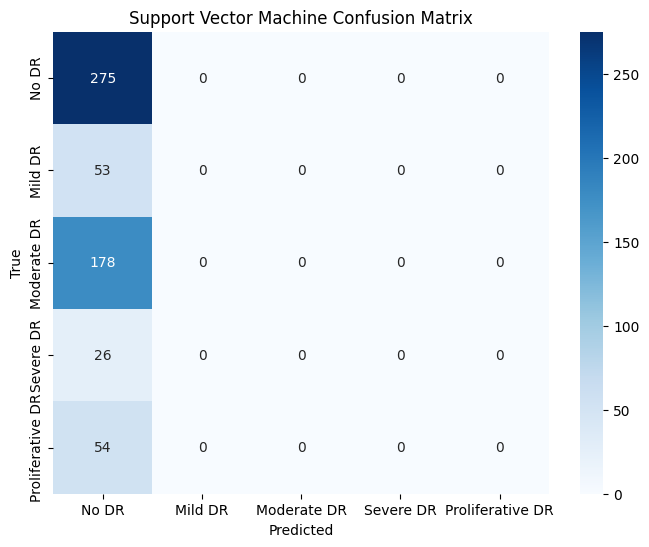

In [11]:
from sklearn.svm import SVC

# Train Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train, y_train)

# Make predictions and evaluate Support Vector Machine classifier
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm * 100:.2f}%')
print(classification_report(y_test, y_pred_svm))

# Generate confusion matrix for Support Vector Machine classifier
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for Support Vector Machine classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **DataFrame for the metrics table with accuracy in LBP feature Extraction**

In [13]:
# Create a DataFrame for the metrics table with accuracy values in percentage form
metrics_df = pd.DataFrame({
    'Method': ['Random Forest Classifier', 'Logistic Regression', 'k-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [f'{accuracy_rf * 100:.2f}%', f'{accuracy_lr * 100:.2f}%', f'{accuracy_knn * 100:.2f}%', f'{accuracy_svm * 100:.2f}%', 
                 f'{accuracy_nb * 100:.2f}%']
})

# Display the DataFrame
metrics_df


,Method,Accuracy
0,Random Forest Classifier,73.55%
1,Logistic Regression,46.59%
2,k-Nearest Neighbors,69.28%
3,Support Vector Machine,46.93%
4,Naive Bayes,36.52%


SIFT Feature Extraction

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns

# Define class names
class_names = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

# Define directory path to images
image_dir = '/kaggle/input/aptos2019/train_images/train_images'

# Load dataset
train_df = pd.read_csv('/kaggle/input/aptos2019/train_1.csv')

# Function to preprocess and extract SIFT features from an image
def preprocess_and_extract_sift(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        descriptors = descriptors.flatten()
        if descriptors.shape[0] < 128 * 20:
            descriptors = np.pad(descriptors, (0, 128 * 20 - descriptors.shape[0]), 'constant')
        else:
            descriptors = descriptors[:128 * 20]
    else:
        descriptors = np.zeros(128 * 20)
    return descriptors

# Prepare the dataset
sift_features_list = []
labels_list = []

for idx, row in train_df.iterrows():
    image_path = os.path.join(image_dir, row['id_code'] + '.png')
    if os.path.exists(image_path):
        features = preprocess_and_extract_sift(image_path)
        sift_features_list.append(features)
        labels_list.append(row['diagnosis'])

# Convert to DataFrame
sift_features_df = pd.DataFrame(sift_features_list)
sift_features_df['label'] = labels_list

In [16]:
sift_features_df

,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,label
0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,157.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,193.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,23.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,183.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,27.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,197.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,23.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2926,12.0,5.0,0.0,0.0,0.0,1.0,9.0,13.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2927,30.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,195.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2928,5.0,0.0,0.0,0.0,0.0,0.0,35.0,89.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
# Split data into training and testing sets
X = sift_features_df.drop(columns=['label'])
y = sift_features_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Support Vector Machine Accuracy: 54.78%
              precision    recall  f1-score   support

           0       0.71      0.79      0.74       275
           1       0.34      0.38      0.36        53
           2       0.49      0.42      0.45       178
           3       0.03      0.04      0.03        26
           4       0.25      0.19      0.21        54

    accuracy                           0.55       586
   macro avg       0.36      0.36      0.36       586
weighted avg       0.54      0.55      0.54       586



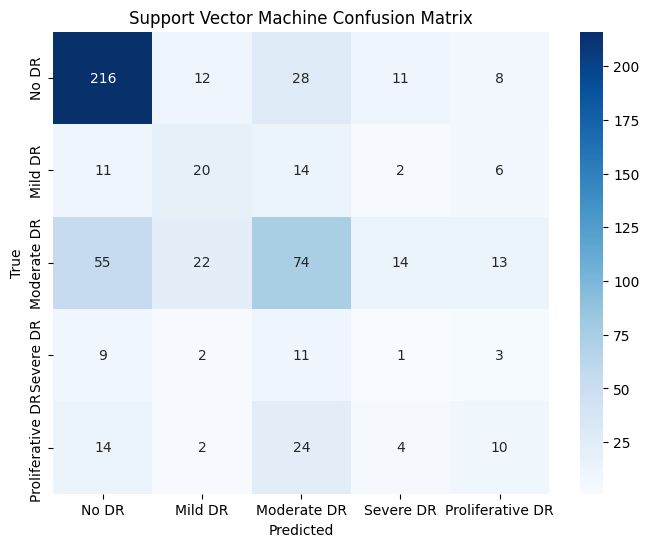

In [23]:
from sklearn.svm import SVC

# Train Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train, y_train)

# Make predictions and evaluate Support Vector Machine classifier
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm * 100:.2f}%')
print(classification_report(y_test, y_pred_svm))

# Generate confusion matrix for Support Vector Machine classifier
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for Support Vector Machine classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 53.07%
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       275
           1       0.30      0.34      0.32        53
           2       0.49      0.44      0.47       178
           3       0.03      0.04      0.03        26
           4       0.22      0.24      0.23        54

    accuracy                           0.53       586
   macro avg       0.35      0.36      0.36       586
weighted avg       0.54      0.53      0.53       586



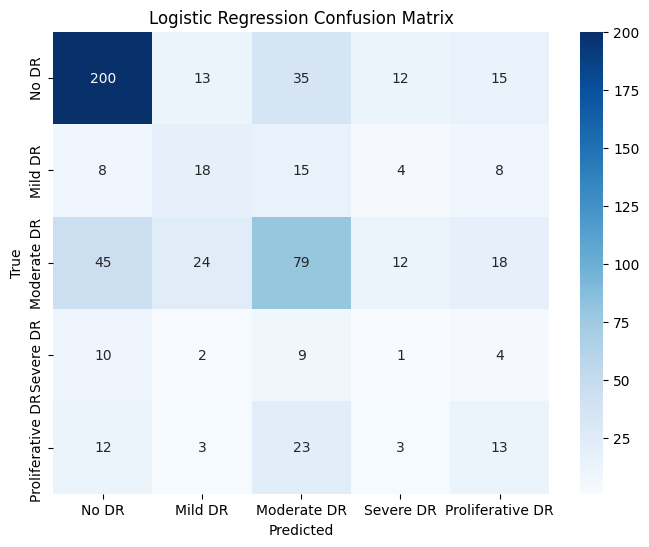

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Train Logistic Regression classifier
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train, y_train)

# Make predictions and evaluate Logistic Regression classifier
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
print(classification_report(y_test, y_pred_lr))

# Generate confusion matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


k-Nearest Neighbors Accuracy: 51.19%
              precision    recall  f1-score   support

           0       0.57      0.89      0.70       275
           1       0.24      0.15      0.19        53
           2       0.38      0.24      0.29       178
           3       0.40      0.08      0.13        26
           4       0.38      0.06      0.10        54

    accuracy                           0.51       586
   macro avg       0.39      0.28      0.28       586
weighted avg       0.46      0.51      0.45       586



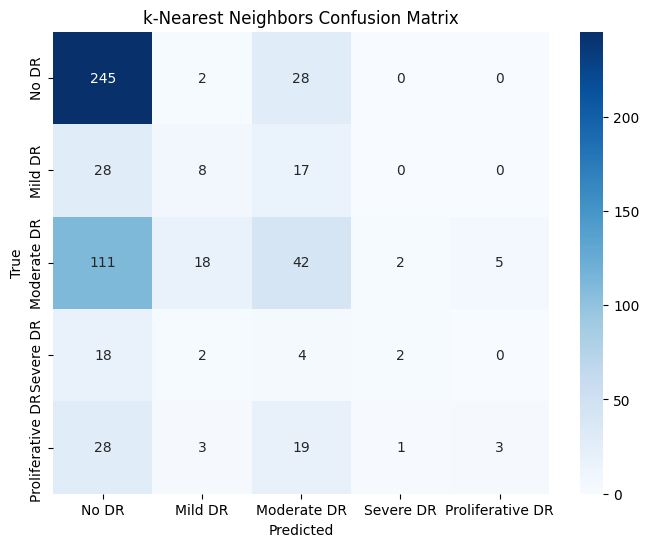

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

# Make predictions and evaluate k-Nearest Neighbors classifier
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print(classification_report(y_test, y_pred_knn))

# Generate confusion matrix for k-Nearest Neighbors
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix for k-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Naive Bayes Accuracy: 18.43%
              precision    recall  f1-score   support

           0       0.67      0.16      0.26       275
           1       0.11      0.85      0.19        53
           2       0.38      0.03      0.05       178
           3       0.13      0.46      0.20        26
           4       0.33      0.02      0.04        54

    accuracy                           0.18       586
   macro avg       0.33      0.30      0.15       586
weighted avg       0.48      0.18      0.17       586



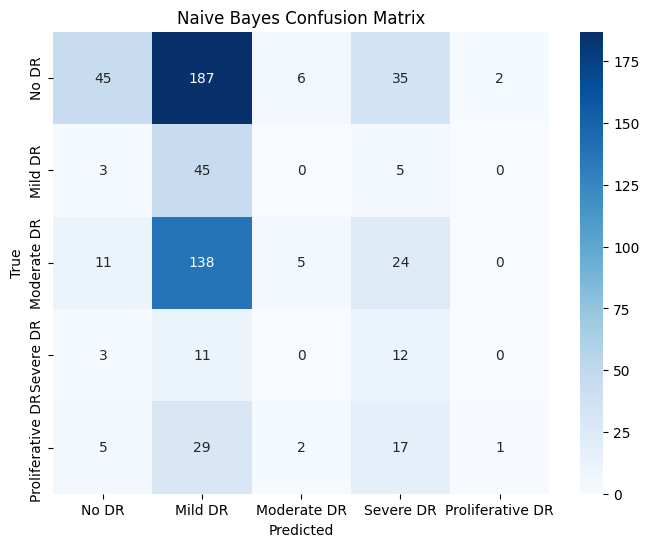

In [30]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Make predictions and evaluate Naive Bayes classifier
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')
print(classification_report(y_test, y_pred_nb))

# Generate confusion matrix for Naive Bayes
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Classifier Accuracy: 59.90%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       275
           1       0.45      0.09      0.16        53
           2       0.53      0.51      0.52       178
           3       1.00      0.04      0.07        26
           4       1.00      0.04      0.07        54

    accuracy                           0.60       586
   macro avg       0.72      0.32      0.31       586
weighted avg       0.63      0.60      0.53       586



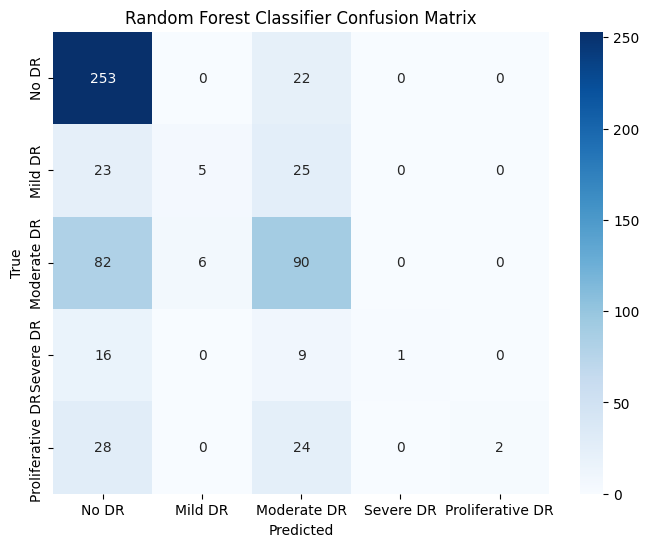

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Make predictions and evaluate Random Forest classifier
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf * 100:.2f}%')
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix for Random Forest classifier
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [29]:
# Create a DataFrame for the metrics table with accuracy values in percentage form
metrics_df = pd.DataFrame({
    'Method': ['Random Forest Classifier', 'Logistic Regression', 'k-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [f'{accuracy_rf * 100:.2f}%', f'{accuracy_lr * 100:.2f}%', f'{accuracy_knn * 100:.2f}%', f'{accuracy_svm * 100:.2f}%', 
                 f'{accuracy_nb * 100:.2f}%']
})

# Display the DataFrame
metrics_df


,Method,Accuracy
0,Random Forest Classifier,59.90%
1,Logistic Regression,53.07%
2,k-Nearest Neighbors,51.19%
3,Support Vector Machine,54.78%
4,Naive Bayes,18.43%
